In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [94]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [95]:
df.shape

(150, 5)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [97]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [98]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [99]:
df.duplicated().sum()

1

In [100]:
df.drop_duplicates(inplace=True)

In [101]:
df.shape

(149, 5)

sepal_length


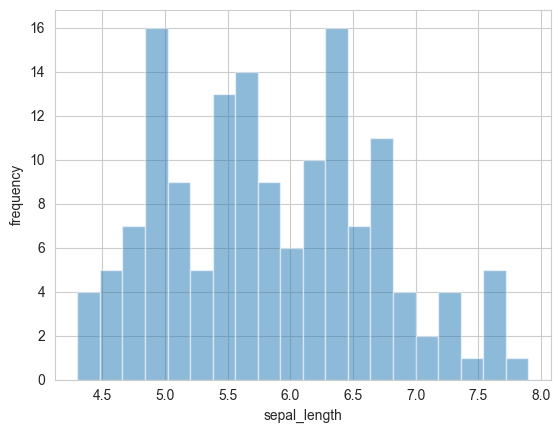

sepal_width


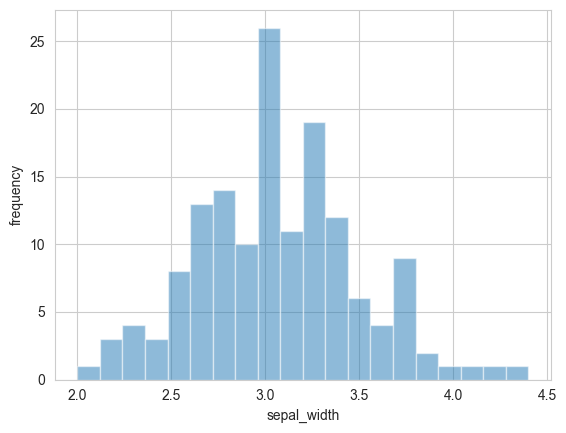

petal_length


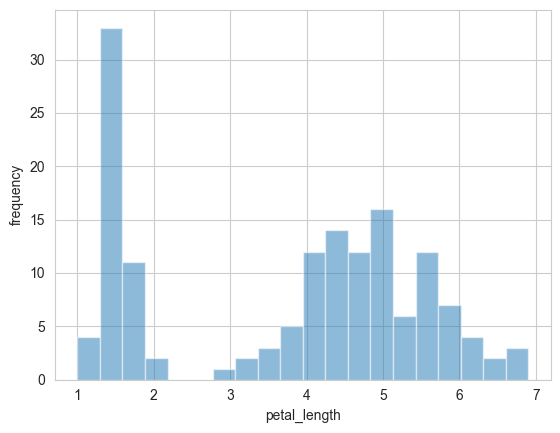

petal_width


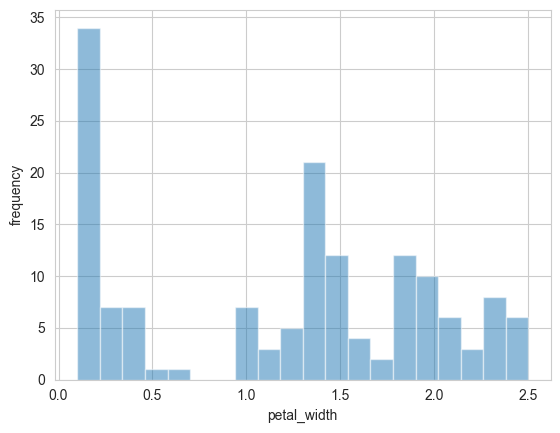

species


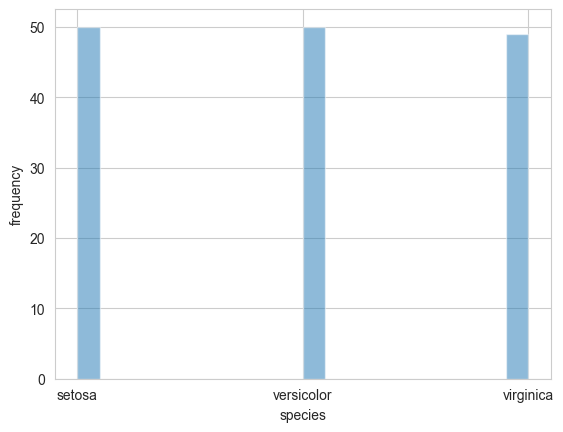

In [102]:
for col in df.columns:
    print(col)
    plt.subplot(1,1,1)
    df[col].hist(bins=20, alpha=0.5)
    plt.ylabel('frequency')
    plt.xlabel(col)
    plt.show()

<Axes: >

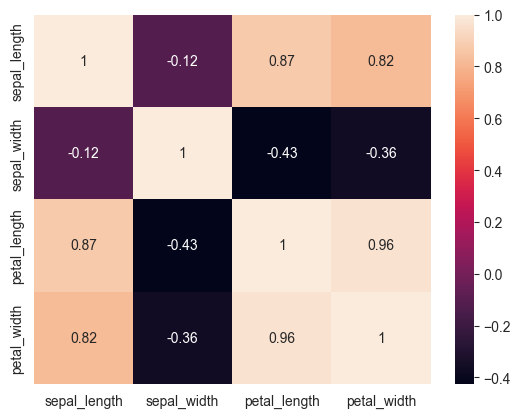

In [103]:
corr = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
sns.heatmap(corr, annot=True)

In [104]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


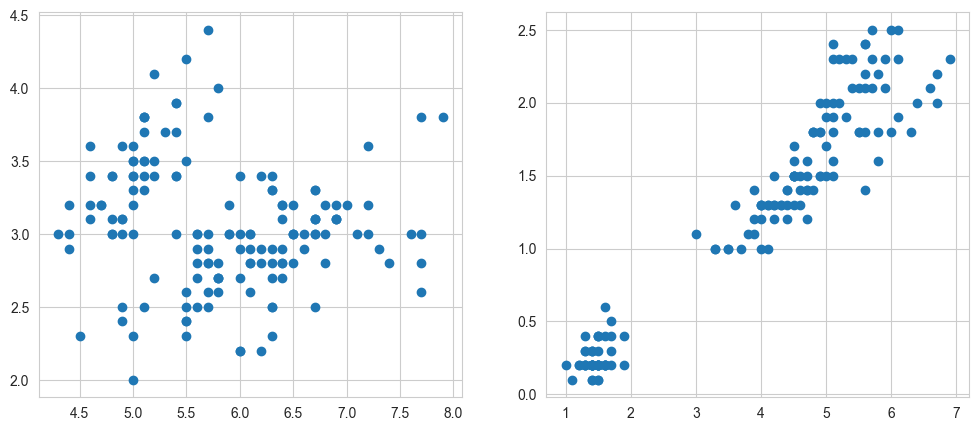

In [105]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X.iloc[:,0],X.iloc[:,1], cmap='Set1')
plt.subplot(1,2,2)
plt.scatter(X.iloc[:,2],X.iloc[:,3], cmap='Set2')
plt.show()

In [106]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)

In [107]:
sse

[678.9328859060404,
 151.9968671383648,
 78.11184615384619,
 56.83295398351648,
 49.74102706729545,
 38.932406417112304,
 34.80156168027019,
 32.19276766233423,
 28.19112877344534,
 26.70400284364758]

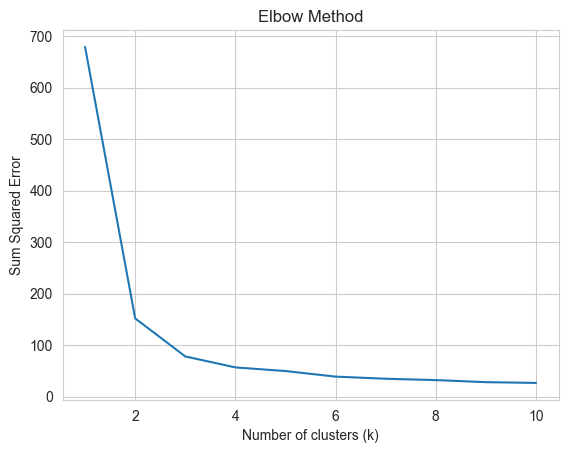

In [108]:
# Plotting
sns.set_style("whitegrid")
plt.plot(range(1, 11), sse)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum Squared Error")
plt.title("Elbow Method")
plt.show()

In [ ]:
# Assuming X is your data matrix
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)  # You can change 3 to any desired number of clusters
kmeans.fit(X)

KMeans(n_clusters=3, random_state=2)

In [110]:
pred = kmeans.fit_predict(X)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])

In [111]:
kmeans.cluster_centers_

array([[5.885     , 2.74166667, 4.37666667, 1.42666667],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

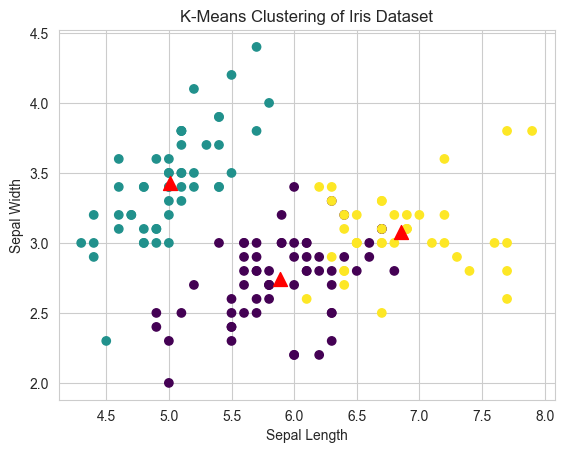

In [119]:
# Visualize the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=pred, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='^')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering of Iris Dataset')
plt.show()

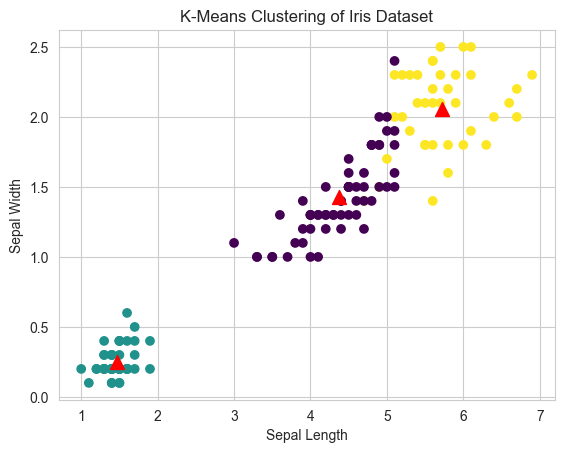

In [120]:
# Visualize the clusters
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=pred, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=100, c='red', marker='^')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering of Iris Dataset')
plt.show()

In [121]:
# Evaluate using different metrics
inertia = kmeans.inertia_
silhouette = silhouette_score(X, pred)

print("Inertia:", inertia)
print("Silhouette Score:", silhouette)

Inertia: 78.11184615384619
Silhouette Score: 0.553639682736222


In [122]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [125]:
new_point = [[6.3,2.2,5.1, 2.2]] 

# Predict the cluster for the new point
predicted_cluster = kmeans.predict(new_point)
print(f'The new point {new_point} belongs to cluster {predicted_cluster[0]}')

The new point [[6.3, 2.2, 5.1, 2.2]] belongs to cluster 2


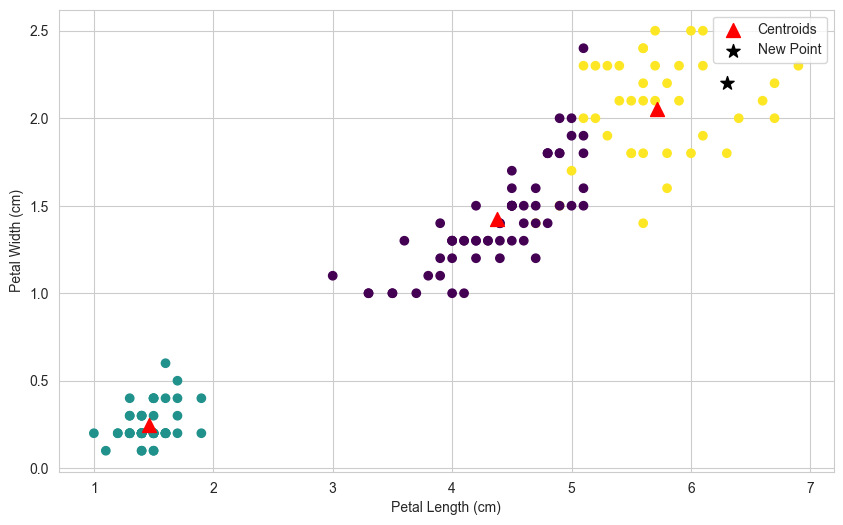

In [126]:
# Optional: Visualize the new point on the same plot
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=pred, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=100, c='red', marker='^', label='Centroids')
plt.scatter(new_point[0][0], new_point[0][1], c='black', s=100, marker='*', label='New Point')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()